### VIDOOLY ASSIGNMENT

### HARDIK AIREN

### Importing necessary libraries

In [932]:
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

In [933]:
cd C:\Users\Hardik Airen\Vidooly

C:\Users\Hardik Airen\Vidooly


In [934]:
df_train = pd.read_csv("ad_org_train.csv")

In [935]:
df_train1 = pd.read_csv("ad_org_train.csv")

In [984]:
df_test = pd.read_csv("ad_org_test.csv")

### Data Preprocess

In [937]:
df_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [985]:
df_test.shape

(8764, 8)

In [939]:
df_train.shape

(14999, 9)

In [940]:
data=[df_train,df_test]

 Convert Category to integral values using map

In [941]:
cate = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
for dataset in data:
    dataset["category"]=dataset["category"].map(cate)

In [942]:
df_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


Removing character " F "  present in data 

In [943]:
df_train=df_train[df_train.views!='F']
df_train=df_train[df_train.likes!='F']
df_train=df_train[df_train.dislikes!='F']
df_train=df_train[df_train.comment!='F']

In [986]:
df_test=df_test[df_test.views!='F']
df_test=df_test[df_test.likes!='F']
df_test=df_test[df_test.dislikes!='F']
df_test=df_test[df_test.comment!='F']

Converting values to integers

In [945]:
df_train["views"] = pd.to_numeric(df_train["views"])
df_train["comment"] = pd.to_numeric(df_train["comment"])
df_train["likes"] = pd.to_numeric(df_train["likes"])
df_train["dislikes"] = pd.to_numeric(df_train["dislikes"])
df_train["adview"]=pd.to_numeric(df_train["adview"])

In [987]:
df_test["views"] = pd.to_numeric(df_test["views"])
df_test["comment"] = pd.to_numeric(df_test["comment"])
df_test["likes"] = pd.to_numeric(df_test["likes"])
df_test["dislikes"] = pd.to_numeric(df_test["dislikes"])

Endoding features like Category,Duration,Vidid and also adding Time_in_sec feature from duration

In [947]:
from sklearn.preprocessing import LabelEncoder
df_train['duration']=LabelEncoder().fit_transform(df_train['duration'])
df_train['vidid']=LabelEncoder().fit_transform(df_train['vidid'])

In [948]:
df_train['published']=LabelEncoder().fit_transform(df_train['published'])

In [988]:
column_vidid=df_test['vidid']
df_test['category'] = LabelEncoder().fit_transform(df_test['category'])
df_test['duration']=LabelEncoder().fit_transform(df_test['duration'])
df_test['vidid']=LabelEncoder().fit_transform(df_test['vidid'])
df_test['published']=LabelEncoder().fit_transform(df_test['published'])


In [989]:
df_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,1
1,3444,1040132,8171,340,1047,1825,2055,5
2,1593,28534,31,11,1,1009,1506,3
3,3775,1316715,2284,250,274,116,2265,6
4,7644,1893173,2519,225,116,1892,1625,1


In [951]:
import datetime
import time

In [952]:
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp

In [953]:
mp = df_train1["duration"]

In [954]:
time  = mp.apply(checki)

In [955]:
mp1 = df_test.duration.copy()

In [957]:
time_test.head()

0     00:7:29
1     00:6:29
2    00:37:54
3     00:9:55
4      00:3:8
Name: duration, dtype: object

In [958]:
def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

In [959]:
time_1= time.apply(func_sec)

In [960]:
time_2 = time_test.apply(func_sec)

In [961]:
time_1.head()

0    457
1    570
2    136
3    262
4     31
Name: duration, dtype: int64

In [962]:
time_2.head()

0     449
1     389
2    2274
3     595
4     188
Name: duration, dtype: int64

In [963]:
df_train.head()
 

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


### Data Visualization

(array([ 358.,  970.,  556.,    0., 7383., 1597.,    0.,  879., 2473.,
         421.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <a list of 10 Patch objects>)

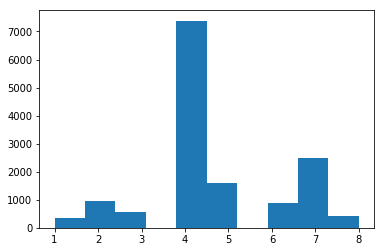

In [964]:
plt.hist(df_train["category"])

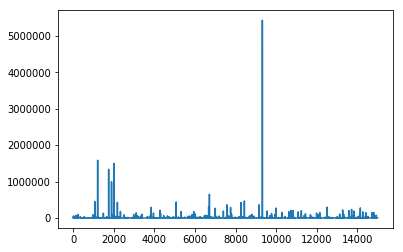

In [965]:
plt.plot(df_train["adview"])

We can remove videos with adview greater than 2000000

In [966]:
df_train = df_train[df_train["adview"] <2000000]

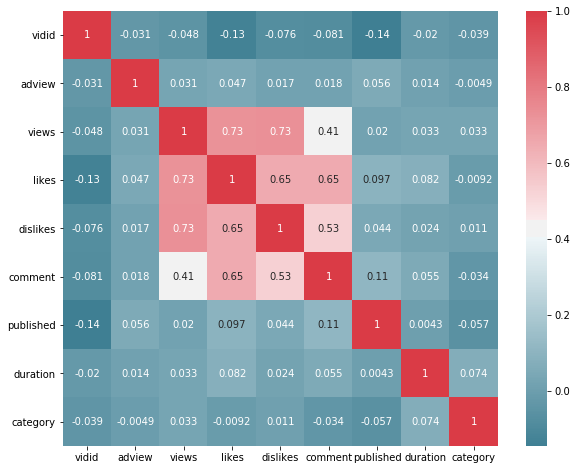

In [967]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = df_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)
plt.show()

As we can se the maximum corelation is between adviews and likes

### Applying Machine Learning Models

In [968]:
Y_train  = pd.DataFrame(data = df_train.iloc[:, 1].values, columns = ['target'])

In [969]:
training_data=df_train.drop(['adview'], axis=1)

In [970]:
from sklearn.model_selection import train_test_split 

In [851]:
df_train = df_train.drop(["adview"],axis=1)

In [971]:
df_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [972]:
X_train, X_test, y_train, y_test = train_test_split(training_data, Y_train, test_size=0.4, random_state=42)

### DECISION TREE

In [1038]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

Y_pred = decision_tree.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))


Mean Absolute Error: 3274.814859094791
Mean Squared Error: 2014711370.350299
Root Mean Squared Error: 44885.536315725345


This model is OK. Lets check for other models as well

### RANDOM FOREST

In [974]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [1039]:
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
clf2 = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
clf2.fit(X_train,y_train)

G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [1040]:
pred=clf2.predict(X_test)

In [1041]:
pred

array([ 32.01074653, 888.8989042 ,   6.60210197, ...,  81.8329101 ,
        74.90252202,   4.52882647])

In [1042]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 2857.8559988730804
Mean Squared Error: 617917769.8586266
Root Mean Squared Error: 24857.951843597788


Random Forests performance is very decent

### LINEAR REGRESSION

In [1043]:
from sklearn import linear_model
reg = linear_model.LinearRegression() 
reg.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [1044]:
pred = reg.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 3589.393734341321
Mean Squared Error: 747269363.6242399
Root Mean Squared Error: 27336.22804309768


### SVR

In [1054]:
from sklearn.svm import SVR
clf4 = SVR()
clf4.fit(X_train,y_train)
y_pred4=clf4.predict(X_test)

G:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
G:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [1055]:
pred=clf4.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4))) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred4))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred4))

Root Mean Squared Error: 27408.247671138037
Mean Absolute Error: 1774.8015507333255
Mean Squared Error: 751212040.4024435


This is looking good with decent mean absolute error

### So SVR and Decision Tree are the two best models among all models

### SUBMISSIONS

### Final Submission with SVR

In [1062]:
sub_ans = clf4.predict(test_features)
values3=hardik1.astype('int')
submission4 = pd.DataFrame({
        "vidid": column_vidid,
        "adview": values3
    })
submission4.to_csv('HARDIK_AIREN_SUBMISSION.csv', index=False)